# Project Wine Reviews

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
% matplotlib inline

pd.options.display.max_seq_items = 500
pd.set_option('max_rows', 500)
pd.set_option('max_columns', 500)

In [2]:
# importing data
wine = pd.read_csv('winemag-data_first150k.csv')

In [3]:
wine = wine.dropna(subset=['price'])

In [4]:
wine['points_bins'] = pd.qcut(wine['points'], q=5, 
                              labels=['very low','low', 'medium', 'high', 'very high'])

In [5]:
wine_price_cap = wine[wine.price < 200] 
print(len(wine_price_cap))

136368


In [6]:
wine_price_cap.head(1)

,country,description,designation,points,price,province,region_1,region_2,variety,winery,points_bins
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,very high


In [7]:
#wine_grouped = wine.groupby(['country'])
print(wine_price_cap.country.value_counts()[:10])

US             62021
Italy          18641
France         14375
Spain           8102
Chile           5753
Argentina       5580
Australia       4855
Portugal        4156
New Zealand     3070
Austria         2480
Name: country, dtype: int64


In [8]:
wine_country_cap = wine_price_cap[
    wine_price_cap.country.isin(wine_price_cap.country.value_counts()[:12].index)]
wine_country_cap.head(1)

,country,description,designation,points,price,province,region_1,region_2,variety,winery,points_bins
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,very high


## Step 2: Decision Trees - Regression

In [9]:
# import Sklean modules
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [10]:
# convert country column into dummy varables
wine_country_dummy = pd.get_dummies(wine_country_cap['country'])
wine_country_cap_dummy = pd.concat([wine_country_cap, wine_country_dummy], axis=1)
wine_country_cap_dummy.head(1)

,country,description,designation,points,price,province,region_1,region_2,variety,winery,points_bins,Argentina,Australia,Austria,Chile,France,Germany,Italy,New Zealand,Portugal,South Africa,Spain,US
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,very high,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [47]:
train, validate, test = np.split(wine_country_cap_dummy.sample(frac=1),
                                 [int(0.7 * len(wine_country_cap_dummy)), 
                                  int(0.85 * len(wine_country_cap_dummy))])
print('Number of Observations in Trainig Set:    ', len(train), '  (70%)',
      '\nNumber of Observations in Validation Set: ', len(validate),'  (15%)',
      '\nNumber of Observations in Test Set:       ', len(test),'  (15%)')

Number of Observations in Trainig Set:     93494   (70%) 
Number of Observations in Validation Set:  20035   (15%) 
Number of Observations in Test Set:        20035   (15%)


In [12]:
X_train = train[['price','Argentina','Australia','Austria','Chile',
                            'France','Germany','Italy','New Zealand','Portugal',
                            'South Africa','Spain','US']]
X_train = np.array(X_train)
y_train = train['points']
y_train = np.array(y_train)

In [13]:
X_validate = validate[['price','Argentina','Australia','Austria','Chile',
                            'France','Germany','Italy','New Zealand','Portugal',
                            'South Africa','Spain','US']]
X_validate = np.array(X_validate)
y_validate = validate['points']
y_validate = np.array(y_validate)

In [14]:
X_test = test[['price','Argentina','Australia','Austria','Chile',
                            'France','Germany','Italy','New Zealand','Portugal',
                            'South Africa','Spain','US']]
X_test = np.array(X_test)
y_test = test['points']
y_test = np.array(y_test)

In [15]:
# build model - fit - predict optimal model based on DT_validation output
model = DecisionTreeRegressor(min_samples_leaf=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_validate)
y_pred_test = model.predict(X_test)

In [16]:
# MAE evaluation
y_training_pred = model.predict(X_train)
print('MAE over training set:    ', mean_absolute_error(y_training_pred, y_train))
print('MAE over validate set:    ', mean_absolute_error(y_pred, y_validate))
print('----------------------------')
# MSE evaluation
print('MSE over training set:    ', mean_squared_error(y_training_pred, y_train))
print('MSE over vaildate set:    ', mean_squared_error(y_pred, y_validate))
print('----------------------------')
# R squared evaluation
print('R^2 over training set:    ', model.score(X_train, y_train))
print('R^2 over validate set:    ', model.score(X_validate, y_validate))

MAE over training set:     1.96182485713
MAE over validate set:     1.99214924119
----------------------------
MSE over training set:     6.14679501295
MSE over vaildate set:     6.32999503076
----------------------------
R^2 over training set:     0.392159679575
R^2 over validate set:     0.384855660647


In [17]:
# Top 10 features
top_tree_weights = sorted(zip(model.feature_importances_, ['price','Argentina','Australia','Austria','Chile',
                                        'France','Germany','Italy','New Zealand','Portugal',
                                        'South Africa','Spain','US']),reverse=True)
top_tree_weights

[(0.93989193172714591, 'price'),
 (0.022027608373969117, 'US'),
 (0.0097927393160933858, 'Portugal'),
 (0.0070352694766186675, 'Spain'),
 (0.005862827504023194, 'Argentina'),
 (0.0045664205830465267, 'Austria'),
 (0.0027383364980359775, 'Italy'),
 (0.0019462612553351225, 'Chile'),
 (0.0015777421081365095, 'France'),
 (0.0014683937868380139, 'Germany'),
 (0.0012553514828319966, 'Australia'),
 (0.0010240618459166149, 'New Zealand'),
 (0.00081305604200903171, 'South Africa')]

In [18]:
df1 = []
df2 = []
for i,j in top_tree_weights:
    df1.append(i)
    df2.append(j)
top_tree = pd.DataFrame({'Feature':df2,'Importance':df1})
#print(top_features)

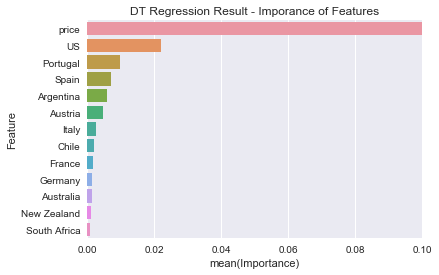

In [19]:
sns.barplot(y='Feature',
            x='Importance',
            data=top_tree)
sns.plt.xlim(0,0.1)
sns.plt.title('DT Regression Result - Imporance of Features')
sns.plt.savefig('tree_weight.png')

# Step 3: Linear SVR Regression

### Count Vectorizer

In [20]:
from sklearn.svm import LinearSVR

In [21]:
# Step 1: Count Vectorization
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
count_vectorizer = CountVectorizer(stop_words='english', min_df=20)
X_train = count_vectorizer.fit_transform(train['description'])
X_validate = count_vectorizer.transform(validate['description'])
X_test = count_vectorizer.transform(test['description'])

In [23]:
print(X_train.shape)
print(type(X_train))

(93494, 5478)
<class 'scipy.sparse.csr.csr_matrix'>


In [24]:
# build model - fit - predict with optimal sample parameter
model = LinearSVR(C=0.1)
model.fit(X_train, y_train)
y_pred2 = model.predict(X_validate)
y_pred_test2 = model.predict(X_test)

In [25]:
print(model.score(X_train, y_train))
print(model.get_params)

0.729942985616
<bound method BaseEstimator.get_params of LinearSVR(C=0.1, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)>


In [26]:
# MAE evaluation
y_training_pred = model.predict(X_train)
print('MAE over training set:    ', mean_absolute_error(y_training_pred, y_train))
print('MAE over validate set:    ', mean_absolute_error(y_pred2, y_validate))
print('----------------------------')
# MSE evaluation
print('MSE over training set:    ', mean_squared_error(y_training_pred, y_train))
print('MSE over vaildate set:    ', mean_squared_error(y_pred2, y_validate))
print('----------------------------')
# R squared evaluation
print('R^2 over training set:    ', model.score(X_train, y_train))
print('R^2 over validate set:    ', model.score(X_validate, y_validate))

MAE over training set:     1.24154947843
MAE over validate set:     1.33751104174
----------------------------
MSE over training set:     2.73095589985
MSE over vaildate set:     2.99103057682
----------------------------
R^2 over training set:     0.729942985616
R^2 over validate set:     0.709333811602


In [27]:
top_feature_names = sorted(zip(model.coef_, count_vectorizer.get_feature_names()),reverse=True)[:20]

In [28]:
df1 = []
df2 = []
for i,j in top_feature_names:
    df1.append(i)
    df2.append(j)
top_features = pd.DataFrame({'Keyword':df2,'Importance':df1})
#print(top_features)

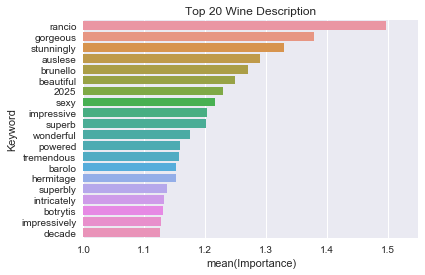

In [37]:
sns.barplot(y='Keyword',
            x='Importance',
            data=top_features)
sns.plt.xlim(1,1.55)
sns.plt.title('Top 20 Wine Description')
sns.plt.savefig('description_count.png')

# Step4: Combining Models

In [30]:
from sklearn.metrics import r2_score

In [31]:
def r2_max():
    r2 = []
    for w in np.arange(0,1,0.1):
        y_combined = (1-w) * y_pred + w * y_pred2
        score = r2_score(y_validate, y_combined)
        r2.append((w,score))
    return max(r2, key=lambda pair:pair[1])

In [32]:
w = r2_max()[0]

In [33]:
y_combined = (1-w) * y_pred + w * y_pred2

In [34]:
# MAE evaluation
print('MAE over validate set:    ', mean_absolute_error(y_combined, y_validate))

MAE over validate set:     1.2968476116


In [35]:
r2_score(y_validate, y_combined)

0.73364970988596512

# Step5: Predictions over Test Set 

In [36]:
y_combined = (1-w) * y_pred_test + w * y_pred_test2
# MAE evaluation
print('MAE over test set:    ', mean_absolute_error(y_combined, y_test))
print('MSE over test set:    ', mean_squared_error(y_combined, y_test))
print('R^2 over test set:    ', r2_score(y_test, y_combined))

MAE over test set:     1.28085967123
MSE over test set:     2.67627032549
R^2 over test set:     0.736753897554
